C:\Users\Dirac\AppData\Local\Temp\ipykernel_87052\2678636690.py:103: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  x = sum(1 for e in eigvals if e <= 0)


n1: 2.71115
m: 0.0
n1: 0.0
m: -2.0
n1: 0.0
m: -1.0
n1: 0.61305
m: -0.5
n1: 1.57625
m: -0.25
n1: 2.03805
m: -0.125
n1: 2.31225
m: -0.0625
n1: 2.53055
m: -0.03125
n1: 2.62235
m: -0.015625
n1: 2.67115
m: -0.0078125
n1: 2.68995
m: -0.00390625
n1: 2.70055
m: -0.001953125
n1: 2.69475
m: -0.0029296875
n1: 2.69755
m: -0.00244140625
n1: 2.69895
m: -0.002197265625
n1: 2.69935
m: -0.0020751953125
n1: 2.70055
m: -0.00201416015625
n1: 2.70015
m: -0.002044677734375
density = 2.70015
mu = -0.002044677734375


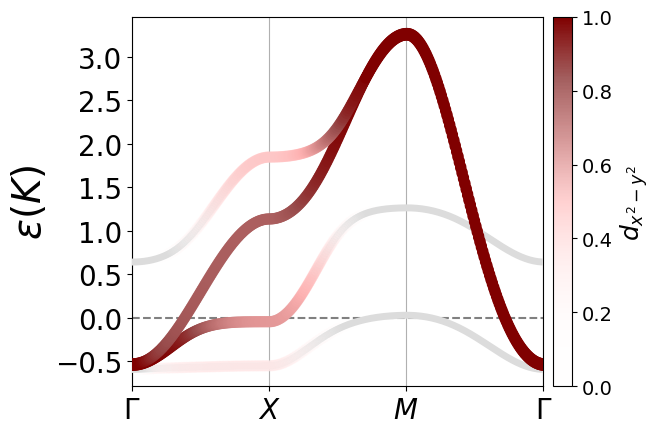

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
from matplotlib.colors import LinearSegmentedColormap
from pylab import *
import scipy
from scipy import *
from scipy import interpolate
from numpy import *
from sympy import symbols, Matrix, init_printing, simplify,lambdify
from scipy.linalg import eigh

color1s = [(1, 1, 1, 0),(1.0, 0.95, 0.95, 0.2),(1.0, 0.85, 0.85, 0.4),
    (1.0, 0.7, 0.7, 0.6),(0.8, 0.5, 0.5, 0.8),(0.6, 0.3, 0.3, 0.9),(0.5, 0, 0, 1)]
cmap_red = LinearSegmentedColormap.from_list('cmap_red',color1s)

color2s = [(1, 1, 1, 0),(0.95, 0.97, 1.0, 0.2),(0.85, 0.9, 1.0, 0.4),
    (0.7, 0.8, 1.0, 0.6),(0.5, 0.65, 0.9, 0.8),(0.3, 0.45, 0.8, 0.9),(0, 0, 0.5, 1)]
cmap_blue = LinearSegmentedColormap.from_list('cmap_blue',color2s)

Ms = ['o','s','^','v','p','h','D','8','<','>','H','o','s','^','v','p','h','D','8','<','>','H', \
      'o','s','^','v','p','h','D','8','<','>','H','o','s','^','v','p','h','D','8','<','>','H']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C0',\
          'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',\
          'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C0',\
          'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']

ds =[2.7]
N = 100
pi = math.pi


ex = 1.0493
ez = 0.3918
t11x = -0.4748
t11xy = 0.0775
t11xx = 0.0
t22x =  -0.0779
t22xy = -0.0147
t22xx = 0.0
t12x = 0.2051
t12xx = 0.0
s110 = 0.0083
s11x = 0.0
s11xy = 0.0
s11xx = 0.0
s220 =  -0.6174
s22x =  0.0
s22xy = 0.0
s22xx = 0.0
s12x =  -0.0277
s12xx = 0.0

'''
ex = 0.776
ez = 0.409
t11x = -0.483
t11xy = 0.069
t11xx = 0.0
t22x =  -0.11
t22xy = -0.017
t22xx = 0.0
t12x = 0.239
t12xx = 0.0
s110 = 0.005
s11x = 0.0
s11xy = 0.0
s11xx = 0.0
s220 =  -0.635
s22x =  0.0
s22xy = 0.0
s22xx = 0.0
s12x =  -0.034
s12xx = 0.0
'''

def findmuforNonband(density,number):
    n = density
    N = number
    a1 = -4; b1 = 4
    m = (a1 + b1) / 2.0
    d = 0.0;d1=0.0;d2=0.0
    X = []
    while n >= 0.0:
        for kx in arange(-pi,pi,pi/N):
            for ky in arange(-pi,pi,pi/N):
                Hx  = ex + 2.*t11x*(cos(kx)+cos(ky)) + 4.*t11xy*cos(kx)*cos(ky) + 2.*t11xx*(cos(2*kx)+cos(2*ky)) - m
                Hz  = ez + 2.*t22x*(cos(kx)+cos(ky)) + 4.*t22xy*cos(kx)*cos(ky) + 2.*t22xx*(cos(2*kx)+cos(2*ky)) - m
                V   = 2.*t12x*(cos(kx)-cos(ky)) + 2.*t12xx*(cos(2*kx)-cos(2*ky))
        
                Hxp = s110 + 2.*s11x*(cos(kx)+cos(ky)) + 4. * s11xy*cos(kx)*cos(ky) + 2.*s11xx*(cos(2*kx)+cos(2*ky))
                Hzp = s220 + 2.*s22x*(cos(kx)+cos(ky)) + 4. * s22xy*cos(kx)*cos(ky) + 2.*s22xx*(cos(2*kx)+cos(2*ky))
                Vp  = 2.*s12x*(cos(kx)-cos(ky)) + 2.*s12xx*(cos(2.*kx)-cos(2.*ky))
                
                H = np.array([[Hx, V, Hxp, Vp],
                              [V, Hz, Vp, Hzp],
                              [Hxp, Vp, Hx, V],
                              [Vp, Hzp, V, Hz]], dtype=complex)
                
                eigvals = np.linalg.eigvalsh(H)
                
                x = sum(1 for e in eigvals if e <= 0)
                d += x * 2  

        n1 = d / (2 * N * 2 * N )
        print('n1:',n1)
        print('m:',m)
        if abs(n1 - n) < 0.0005:
            break

        if n1 > n:
            b1 = m
            m = (a1 + b1) / 2.0
            d = 0.0
        elif n1 < n:
            a1 = m
            m = (a1 + b1) / 2.0
            d = 0.0

    print('density =', n1)
    print('mu =', m)
    return n1,m,N


def noninteractingband(chemicalpotential,number):
    m = chemicalpotential
    N = number
    ye0=[];ye1=[];ye2=[];ye3=[]
    ye00=[];ye01=[];ye02=[]
    ye10=[];ye11=[];ye12=[]
    ye20=[];ye21=[];ye22=[]
    ye30=[];ye31=[];ye32=[]
    for kx in arange(0,pi+pi/N,pi/N):
        ky = 0
        Hx  = ex + 2.*t11x*(cos(kx)+cos(ky)) + 4.*t11xy*cos(kx)*cos(ky) + 2.*t11xx*(cos(2*kx)+cos(2*ky)) - m
        Hz  = ez + 2.*t22x*(cos(kx)+cos(ky)) + 4.*t22xy*cos(kx)*cos(ky) + 2.*t22xx*(cos(2*kx)+cos(2*ky)) - m
        V   = 2.*t12x*(cos(kx)-cos(ky)) + 2.*t12xx*(cos(2*kx)-cos(2*ky))

        Hxp = s110 + 2.*s11x*(cos(kx)+cos(ky)) + 4. * s11xy*cos(kx)*cos(ky) + 2.*s11xx*(cos(2*kx)+cos(2*ky))
        Hzp = s220 + 2.*s22x*(cos(kx)+cos(ky)) + 4. * s22xy*cos(kx)*cos(ky) + 2.*s22xx*(cos(2*kx)+cos(2*ky))
        Vp  = 2.*s12x*(cos(kx)-cos(ky)) + 2.*s12xx*(cos(2.*kx)-cos(2.*ky))
        
        H = np.array([[Hx, V, Hxp, Vp],
                      [V, Hz, Vp, Hzp],
                      [Hxp, Vp, Hx, V],
                      [Vp, Hzp, V, Hz]], dtype=complex)

        eigvals = np.linalg.eigvalsh(H)
        
        ye00.append(eigvals[0]);ye10.append(eigvals[1]);ye20.append(eigvals[2]);ye30.append(eigvals[3])

    for ky in arange(pi/N,pi+pi/N,pi/N):
        kx = pi
        Hx  = ex + 2.*t11x*(cos(kx)+cos(ky)) + 4.*t11xy*cos(kx)*cos(ky) + 2.*t11xx*(cos(2*kx)+cos(2*ky)) - m
        Hz  = ez + 2.*t22x*(cos(kx)+cos(ky)) + 4.*t22xy*cos(kx)*cos(ky) + 2.*t22xx*(cos(2*kx)+cos(2*ky)) - m
        V   = 2.*t12x*(cos(kx)-cos(ky)) + 2.*t12xx*(cos(2*kx)-cos(2*ky))

        Hxp = s110 + 2.*s11x*(cos(kx)+cos(ky)) + 4. * s11xy*cos(kx)*cos(ky) + 2.*s11xx*(cos(2*kx)+cos(2*ky))
        Hzp = s220 + 2.*s22x*(cos(kx)+cos(ky)) + 4. * s22xy*cos(kx)*cos(ky) + 2.*s22xx*(cos(2*kx)+cos(2*ky))
        Vp  = 2.*s12x*(cos(kx)-cos(ky)) + 2.*s12xx*(cos(2.*kx)-cos(2.*ky))
        
        H = np.array([[Hx, V, Hxp, Vp],
                      [V, Hz, Vp, Hzp],
                      [Hxp, Vp, Hx, V],
                      [Vp, Hzp, V, Hz]], dtype=complex)

        eigvals = np.linalg.eigvalsh(H)
        
        ye01.append(eigvals[0]);ye11.append(eigvals[1]);ye21.append(eigvals[2]);ye31.append(eigvals[3])

    for kx in arange(-pi+pi/N,0,pi/N):
        ky = kx
        Hx  = ex + 2.*t11x*(cos(kx)+cos(ky)) + 4.*t11xy*cos(kx)*cos(ky) + 2.*t11xx*(cos(2*kx)+cos(2*ky)) - m
        Hz  = ez + 2.*t22x*(cos(kx)+cos(ky)) + 4.*t22xy*cos(kx)*cos(ky) + 2.*t22xx*(cos(2*kx)+cos(2*ky)) - m
        V   = 2.*t12x*(cos(kx)-cos(ky)) + 2.*t12xx*(cos(2*kx)-cos(2*ky))

        Hxp = s110 + 2.*s11x*(cos(kx)+cos(ky)) + 4. * s11xy*cos(kx)*cos(ky) + 2.*s11xx*(cos(2*kx)+cos(2*ky))
        Hzp = s220 + 2.*s22x*(cos(kx)+cos(ky)) + 4. * s22xy*cos(kx)*cos(ky) + 2.*s22xx*(cos(2*kx)+cos(2*ky))
        Vp  = 2.*s12x*(cos(kx)-cos(ky)) + 2.*s12xx*(cos(2.*kx)-cos(2.*ky))
        
        H = np.array([[Hx, V, Hxp, Vp],
                      [V, Hz, Vp, Hzp],
                      [Hxp, Vp, Hx, V],
                      [Vp, Hzp, V, Hz]], dtype=complex)

        eigvals = np.linalg.eigvalsh(H)
        
        ye02.append(eigvals[0]);ye12.append(eigvals[1]);ye22.append(eigvals[2]);ye32.append(eigvals[3])

    ye0 = ye00+ye01+ye02;ye1 = ye10+ye11+ye12;ye2 = ye20+ye21+ye22;ye3 = ye30+ye31+ye32;
    return ye0,ye1,ye2,ye3

def findweight_Gamma_X(chemicalpotential,number):    
    m = chemicalpotential
    N = number
    w01 = [];w02 = [];w03 = [];w04 = []
    w05 = [];w06 = [];w07 = [];w08 = []
    for kx in np.arange(0,pi+pi/N,pi/N):
        ky = 0
        Hx  = ex + 2.*t11x*(cos(kx)+cos(ky)) + 4.*t11xy*cos(kx)*cos(ky) + 2.*t11xx*(cos(2*kx)+cos(2*ky)) - m
        Hz  = ez + 2.*t22x*(cos(kx)+cos(ky)) + 4.*t22xy*cos(kx)*cos(ky) + 2.*t22xx*(cos(2*kx)+cos(2*ky)) - m
        V   = 2.*t12x*(cos(kx)-cos(ky)) + 2.*t12xx*(cos(2*kx)-cos(2*ky))

        Hxp = s110 + 2.*s11x*(cos(kx)+cos(ky)) + 4. * s11xy*cos(kx)*cos(ky) + 2.*s11xx*(cos(2*kx)+cos(2*ky))
        Hzp = s220 + 2.*s22x*(cos(kx)+cos(ky)) + 4. * s22xy*cos(kx)*cos(ky) + 2.*s22xx*(cos(2*kx)+cos(2*ky))
        Vp  = 2.*s12x*(cos(kx)-cos(ky)) + 2.*s12xx*(cos(2.*kx)-cos(2.*ky))
        
        H = np.array([[Hx, V, Hxp, Vp],
                      [V, Hz, Vp, Hzp],
                      [Hxp, Vp, Hx, V],
                      [Vp, Hzp, V, Hz]], dtype=complex)
        
        eigvals, eigvecs = np.linalg.eigh(H)  # eigvecs[:, i] to eigvals[i]
        
        vec0 = eigvecs[:, 0]
        vec1 = eigvecs[:, 1]
        vec2 = eigvecs[:, 2]
        vec3 = eigvecs[:, 3]
    
        a0x = float(abs(vec0[0])**2 + abs(vec0[2])**2); w01.append(a0x)
        b0z = float(abs(vec0[1])**2 + abs(vec0[3])**2); w02.append(b0z)
        
        a1x = float(abs(vec1[0])**2 + abs(vec1[2])**2); w03.append(a1x)
        b1z = float(abs(vec1[1])**2 + abs(vec1[3])**2); w04.append(b1z)
        
        a2x = float(abs(vec2[0])**2 + abs(vec2[2])**2); w05.append(a2x)
        b2z = float(abs(vec2[1])**2 + abs(vec2[3])**2); w06.append(b2z)
        
        a3x = float(abs(vec3[0])**2 + abs(vec3[2])**2); w07.append(a3x)
        b3z = float(abs(vec3[1])**2 + abs(vec3[3])**2); w08.append(b3z)
        
    #print(w06)
    return w01,w02,w03,w04,w05,w06,w07,w08

def findweight_X_M(chemicalpotential,number):    
    m = chemicalpotential
    N = number
    w01 = [];w02 = [];w03 = [];w04 = []
    w05 = [];w06 = [];w07 = [];w08 = []

    for ky in np.arange(pi/N,pi+pi/N,pi/N):
        kx = pi
        Hx  = ex + 2.*t11x*(cos(kx)+cos(ky)) + 4.*t11xy*cos(kx)*cos(ky) + 2.*t11xx*(cos(2*kx)+cos(2*ky)) - m
        Hz  = ez + 2.*t22x*(cos(kx)+cos(ky)) + 4.*t22xy*cos(kx)*cos(ky) + 2.*t22xx*(cos(2*kx)+cos(2*ky)) - m
        V   = 2.*t12x*(cos(kx)-cos(ky)) + 2.*t12xx*(cos(2*kx)-cos(2*ky))

        Hxp = s110 + 2.*s11x*(cos(kx)+cos(ky)) + 4. * s11xy*cos(kx)*cos(ky) + 2.*s11xx*(cos(2*kx)+cos(2*ky))
        Hzp = s220 + 2.*s22x*(cos(kx)+cos(ky)) + 4. * s22xy*cos(kx)*cos(ky) + 2.*s22xx*(cos(2*kx)+cos(2*ky))
        Vp  = 2.*s12x*(cos(kx)-cos(ky)) + 2.*s12xx*(cos(2.*kx)-cos(2.*ky))
        
        H = np.array([[Hx, V, Hxp, Vp],
                      [V, Hz, Vp, Hzp],
                      [Hxp, Vp, Hx, V],
                      [Vp, Hzp, V, Hz]], dtype=complex)
        
        eigvals, eigvecs = np.linalg.eigh(H)  # eigvecs[:, i] to eigvals[i]
        
        vec0 = eigvecs[:, 0]
        vec1 = eigvecs[:, 1]
        vec2 = eigvecs[:, 2]
        vec3 = eigvecs[:, 3]
    
        a0x = float(abs(vec0[0])**2 + abs(vec0[2])**2); w01.append(a0x)
        b0z = float(abs(vec0[1])**2 + abs(vec0[3])**2); w02.append(b0z)
        
        a1x = float(abs(vec1[0])**2 + abs(vec1[2])**2); w03.append(a1x)
        b1z = float(abs(vec1[1])**2 + abs(vec1[3])**2); w04.append(b1z)
        
        a2x = float(abs(vec2[0])**2 + abs(vec2[2])**2); w05.append(a2x)
        b2z = float(abs(vec2[1])**2 + abs(vec2[3])**2); w06.append(b2z)
        
        a3x = float(abs(vec3[0])**2 + abs(vec3[2])**2); w07.append(a3x)
        b3z = float(abs(vec3[1])**2 + abs(vec3[3])**2); w08.append(b3z)
        
    return w01,w02,w03,w04,w05,w06,w07,w08

def findweight_M_Gamma(chemicalpotential,number):    
    m = chemicalpotential
    N = number
    w01 = [];w02 = [];w03 = [];w04 = []
    w05 = [];w06 = [];w07 = [];w08 = []
    
    for kx in np.arange(-pi+pi/N,0,pi/N):
        ky = kx
        Hx  = ex + 2.*t11x*(cos(kx)+cos(ky)) + 4.*t11xy*cos(kx)*cos(ky) + 2.*t11xx*(cos(2*kx)+cos(2*ky)) - m
        Hz  = ez + 2.*t22x*(cos(kx)+cos(ky)) + 4.*t22xy*cos(kx)*cos(ky) + 2.*t22xx*(cos(2*kx)+cos(2*ky)) - m
        V   = 2.*t12x*(cos(kx)-cos(ky)) + 2.*t12xx*(cos(2*kx)-cos(2*ky))

        Hxp = s110 + 2.*s11x*(cos(kx)+cos(ky)) + 4. * s11xy*cos(kx)*cos(ky) + 2.*s11xx*(cos(2*kx)+cos(2*ky))
        Hzp = s220 + 2.*s22x*(cos(kx)+cos(ky)) + 4. * s22xy*cos(kx)*cos(ky) + 2.*s22xx*(cos(2*kx)+cos(2*ky))
        Vp  = 2.*s12x*(cos(kx)-cos(ky)) + 2.*s12xx*(cos(2.*kx)-cos(2.*ky))
        
        H = np.array([[Hx, V, Hxp, Vp],
                      [V, Hz, Vp, Hzp],
                      [Hxp, Vp, Hx, V],
                      [Vp, Hzp, V, Hz]], dtype=complex)
        
        eigvals, eigvecs = np.linalg.eigh(H)  #eigvecs[:, i] to eigvals[i]
        
        vec0 = eigvecs[:, 0]
        vec1 = eigvecs[:, 1]
        vec2 = eigvecs[:, 2]
        vec3 = eigvecs[:, 3]
    
        a0x = float(abs(vec0[0])**2 + abs(vec0[2])**2); w01.append(a0x)
        b0z = float(abs(vec0[1])**2 + abs(vec0[3])**2); w02.append(b0z)
        
        a1x = float(abs(vec1[0])**2 + abs(vec1[2])**2); w03.append(a1x)
        b1z = float(abs(vec1[1])**2 + abs(vec1[3])**2); w04.append(b1z)
        
        a2x = float(abs(vec2[0])**2 + abs(vec2[2])**2); w05.append(a2x)
        b2z = float(abs(vec2[1])**2 + abs(vec2[3])**2); w06.append(b2z)
        
        a3x = float(abs(vec3[0])**2 + abs(vec3[2])**2); w07.append(a3x)
        b3z = float(abs(vec3[1])**2 + abs(vec3[3])**2); w08.append(b3z)
        
    #print(w27)
    return w01,w02,w03,w04,w05,w06,w07,w08
    

for iid in range(len(ds)):
    d = ds[iid]
    n,m,N = findmuforNonband(d,N)
    xe = np.linspace(0,3*pi,3*N)
    ye0,ye1,ye2,ye3 = noninteractingband(m,N)
    w01,w02,w03,w04,w05,w06,w07,w08 = findweight_Gamma_X(m,N) ### odd index for dx2y2
    w11,w12,w13,w14,w15,w16,w17,w18 = findweight_X_M(m,N)
    w21,w22,w23,w24,w25,w26,w27,w28 = findweight_M_Gamma(m,N)
    
    x0 = w01+w11+w21;x1 = w03+w13+w23
    x2 = w05+w15+w25;x3 = w07+w17+w27

    z0 = w02+w12+w22;z1 = w04+w14+w24
    z2 = w06+w16+w26;z3 = w08+w18+w28
    
    for x in range(2):
        clf()
        plt.plot([0,3*pi],[0,0],linestyle='--',color='gray')
        
        plt.xlim(0,3*pi)
        plt.ylabel(r'$\epsilon(K)$',fontsize=28)
        plt.grid(axis='x')
        X =[0,pi,2*pi,3*pi]
        plt.xticks(X,[r'$\Gamma$',r'$X$',r'$M$',r'$\Gamma$'],fontsize=20)
        plt.yticks(fontsize=20)
    
        plt.plot(xe,ye0,color='gainsboro',linewidth=5,zorder=10)
        plt.plot(xe,ye1,color='gainsboro',linewidth=5,zorder=10)
        plt.plot(xe,ye2,color='gainsboro',linewidth=5,zorder=10)
        plt.plot(xe,ye3,color='gainsboro',linewidth=5,zorder=10)
        if x == 0:
            scatter0 = plt.scatter(xe, ye0, c=z0, s=50, cmap=cmap_blue, vmin=0, vmax=1,zorder=20)
            scatter1 = plt.scatter(xe, ye1, c=z1, s=50, cmap=cmap_blue, vmin=0, vmax=1,zorder=20)
            scatter2 = plt.scatter(xe, ye2, c=z2, s=50, cmap=cmap_blue, vmin=0, vmax=1,zorder=20)
            scatter3 = plt.scatter(xe, ye3, c=z3, s=50, cmap=cmap_blue, vmin=0, vmax=1,zorder=20)
            cbar = plt.colorbar(scatter0, orientation='vertical', pad=0.02)
            cbar.set_label(r'$d_{z^2}$', fontsize=18)
            cbar.ax.tick_params(labelsize=14)
            plt.savefig('./dz2_weight_compress.pdf',bbox_inches='tight')
    
        if x == 1:
            scatter0 = plt.scatter(xe, ye0, c=x0, s=50, cmap=cmap_red, vmin=0, vmax=1,zorder=20)
            scatter1 = plt.scatter(xe, ye1, c=x1, s=50, cmap=cmap_red, vmin=0, vmax=1,zorder=20)
            scatter2 = plt.scatter(xe, ye2, c=x2, s=50, cmap=cmap_red, vmin=0, vmax=1,zorder=20)
            scatter3 = plt.scatter(xe, ye3, c=x3, s=50, cmap=cmap_red, vmin=0, vmax=1,zorder=20)
            cbar = plt.colorbar(scatter0, orientation='vertical', pad=0.02)
            cbar.set_label(r'$d_{x^2-y^2}$', fontsize=18)
            cbar.ax.tick_params(labelsize=14)
            plt.savefig('dx2y2_weight_compress.pdf',bbox_inches='tight')
